## Mobile Price Classification

# Mobile Dataset Overview

Bob has started his own mobile company and wants to estimate the price range of his mobile phones. The dataset contains sales data of various mobile phones from different companies. It includes information about 21 features and 2000 rows. The goal is to predict the price range of the mobile phone based on these features.

## Attributes Description

| **Attribute**          | **Description**                                                                                  |
|------------------------|--------------------------------------------------------------------------------------------------|
| **battery_power**       | Total energy a battery can store in one time, measured in mAh.                                   |
| **blue**                | Has Bluetooth or not (1: Yes, 0: No).                                                            |
| **clock_speed**         | Speed at which the microprocessor executes instructions, measured in GHz.                        |
| **dual_sim**            | Has dual SIM support or not (1: Yes, 0: No).                                                     |
| **fc**                  | Front camera resolution in Megapixels.                                                           |
| **four_g**              | Has 4G or not (1: Yes, 0: No).                                                                   |
| **int_memory**          | Internal memory in Gigabytes.                                                                    |
| **m_dep**               | Mobile depth in centimeters.                                                                     |
| **mobile_wt**           | Weight of the mobile phone in grams.                                                             |
| **pc**                  | Primary camera resolution in Megapixels.                                                         |
| **px_height**           | Pixel resolution height.                                                                         |
| **px_width**            | Pixel resolution width.                                                                          |
| **ram**                 | Random Access Memory in Megabytes.                                                               |
| **sc_h**                | Screen height of the mobile in centimeters.                                                     |
| **sc_w**                | Screen width of the mobile in centimeters.                                                      |
| **talk_time**           | Longest time the battery lasts while talking continuously (in hours).                            |
| **three_g**             | Has 3G or not (1: Yes, 0: No).                                                                   |
| **touch_screen**        | Has touch screen or not (1: Yes, 0: No).                                                         |
| **wifi**                | Has WiFi or not (1: Yes, 0: No).                                                                  |
| **n_cores**             | Number of cores in the mobile's processor.                                                       |
| **price_range**         | Target variable representing the price range of the mobile phone (0: Low Cost, 1: Medium Cost, 2: High Cost, 3: Very High Cost). |

## Dataset Summary
- **Categorical Data**: Represented with numbers (binary or discrete).
- **Target Variable**: `price_range` which represents the price classification.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data = pd.read_csv('train.csv')
df_train=data.copy()
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
def check_df(df: object):
    """
    Display summary information about a pandas DataFrame.
    """
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\ndublicated")
    print(df.duplicated().sum())
    print("\nInfo")
    print(df.info())


In [5]:
check_df(df_train)


Shape
(2000, 21)

Types
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

NANs
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

dublicated
0

Inf

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
def unique_counts(df:object) -> object:
    """
    Calculate the number of unique values for each column in a DataFrame,
    store the results in a new DataFrame, and return it sorted by the count.
    """
    dd=df.nunique()
    sorted_unique_df = dd.to_frame().T
    
    return sorted_unique_df

In [8]:
unique_counts(df_train)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1094,2,26,2,20,2,63,10,121,8,...,1137,1109,1562,15,19,19,2,2,2,4


In [9]:
def plot_box(df: pd.DataFrame, categorical_columns: list):
    """
    Create box plots for numerical columns in the DataFrame, excluding the specified categorical columns.
    """
    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, len(numerical_columns) * 4))
    if len(numerical_columns) == 1:
        axes = [axes]
    for ax, col in zip(axes, numerical_columns):
        sns.boxplot(data=df, x=col, ax=ax, color='skyblue')
        ax.set_title(f'Box Plot for {col}', fontsize=16, fontweight='bold', family='serif')
        ax.set_xlabel('', fontsize=12)
    plt.tight_layout()
    plt.show()

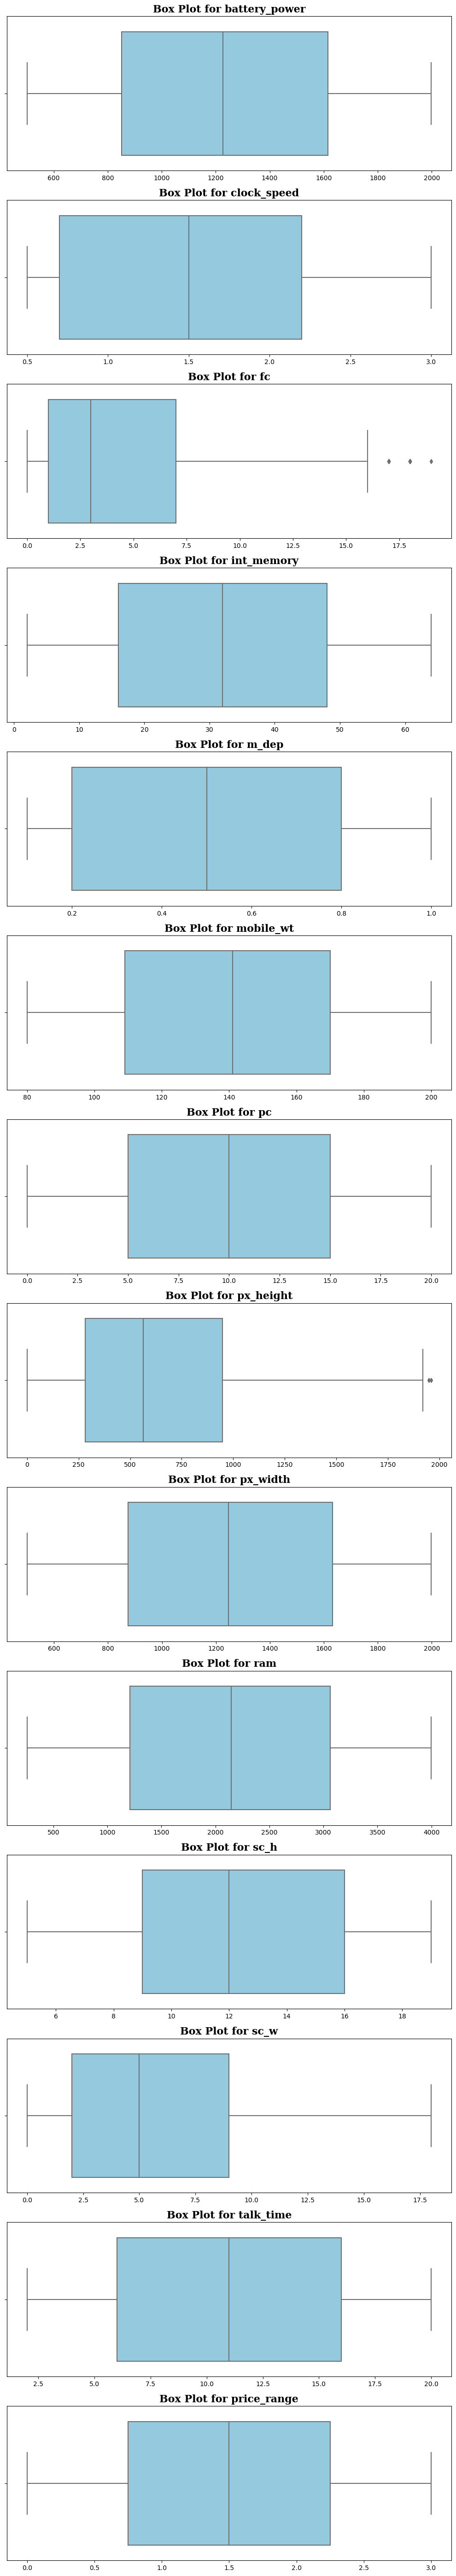

In [10]:
categorical_cols = ['n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
plot_box(df_train, categorical_cols)

In [11]:
def show_data_distribution(df, figsize=(15, 10)):
    """
    Display the distribution of data for each column in the DataFrame.
    """
    num_columns = len(df.columns)
    rows = (num_columns + 2) // 3  # Arrange 3 plots per row

    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if df[col].dtype == 'object' or df[col].nunique() <= 10:
            # Plot for categorical data
            sns.countplot(data=df, x=col, ax=ax, palette="pastel",legend=False)
            ax.set_title(f'Count Plot for {col}', fontsize=12)
        else:
            # Plot for numerical data
            sns.histplot(data=df, x=col, kde=True, ax=ax, color='skyblue')
            ax.set_title(f'Distribution of {col}', fontsize=12)

        ax.set_xlabel('')
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


C:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

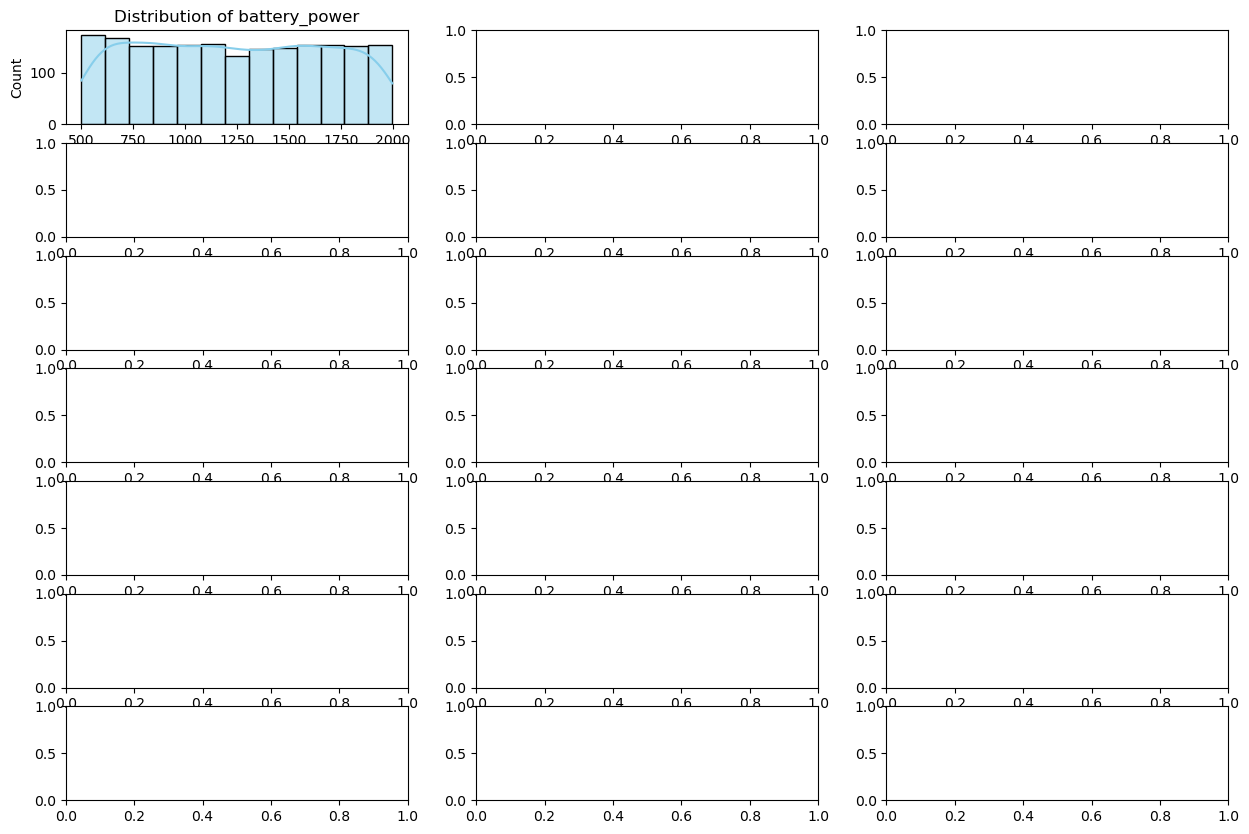

In [12]:
show_data_distribution(df_train)

In [13]:
df_train.skew(axis = 0, skipna = True) 

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

positive skewness (right-skewness) is visible for fc, m_dep, sc_w, clock_speed, px_height.

normal disturbation is visible for many columns such as int_memory, mobile_wt, pc and talk time for all price ranges.

majority of phones support three g

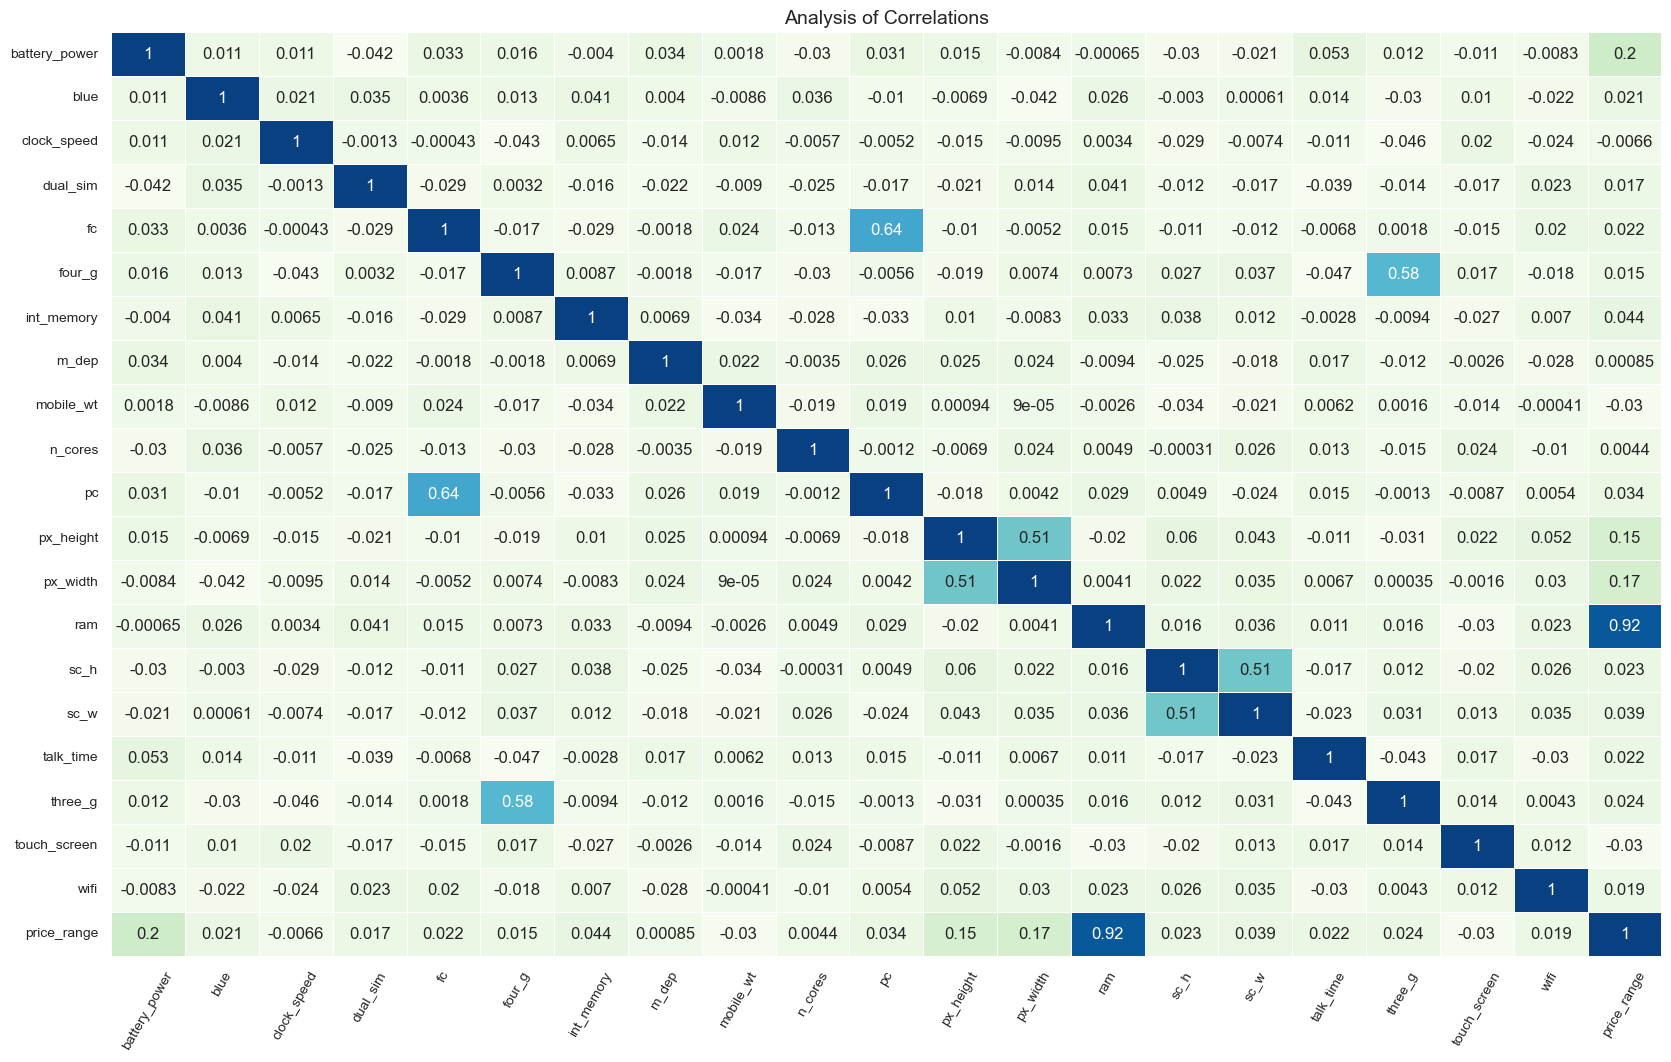

In [14]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(df_train, plot=True)

Text(0.5, 1.0, 'Features Correlating with Price Range')

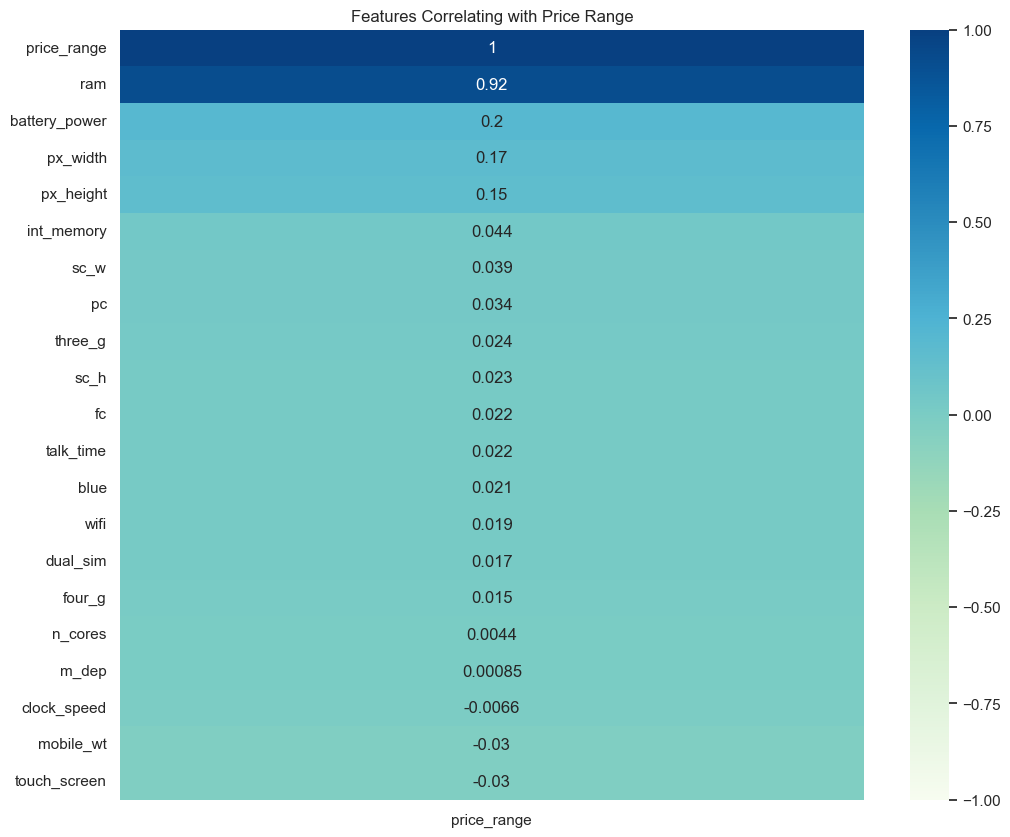

In [15]:
plt.figure (figsize = (12 , 10) , dpi = 100)
heatmap = sns.heatmap (df_train.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range')

In [16]:
# Group data by 'price_range' and display summary statistics for numerical columns
grouped_data = df_train.groupby('price_range').mean()
print("Grouped Data by Price Range (Mean Values):")
print(grouped_data)

Grouped Data by Price Range (Mean Values):
             battery_power   blue  clock_speed  dual_sim     fc  four_g  \
price_range                                                               
0                 1116.902  0.486       1.5502     0.500  4.084   0.518   
1                 1228.868  0.490       1.4886     0.510  4.340   0.524   
2                 1228.320  0.486       1.5298     0.498  4.498   0.494   
3                 1379.984  0.518       1.5204     0.530  4.316   0.550   

             int_memory   m_dep  mobile_wt  n_cores      pc  px_height  \
price_range                                                              
0                31.174  0.4902    140.552    4.600   9.574    536.408   
1                32.116  0.5240    140.510    4.298   9.924    666.892   
2                30.920  0.4908    143.614    4.682  10.018    632.284   
3                33.976  0.5020    136.320    4.502  10.150    744.848   

             px_width       ram    sc_h   sc_w  talk_time  th

C:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

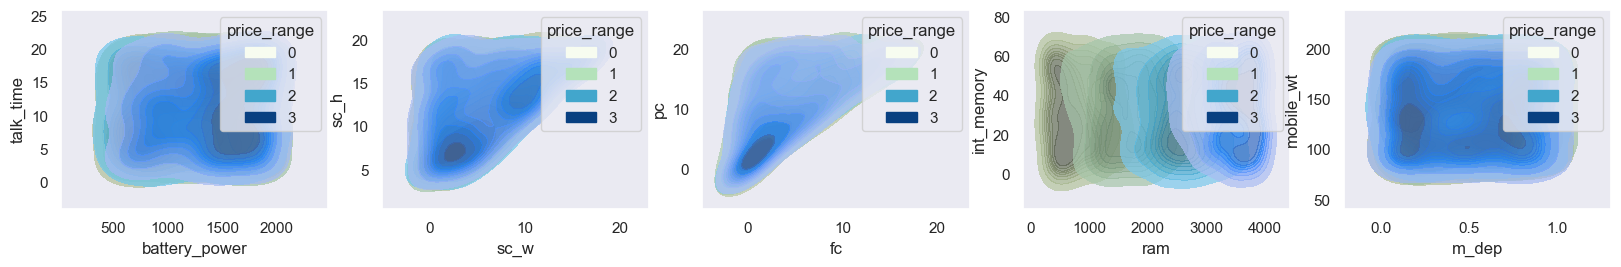

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(5,5,1)
sns.kdeplot(data=df_train,x='battery_power', y='talk_time', hue='price_range',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='GnBu')
plt.grid()
plt.subplot(5,5,2)
sns.kdeplot(data=df_train,x='sc_w', y='sc_h', hue='price_range',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='GnBu')
plt.grid()
plt.subplot(5,5,3)
sns.kdeplot(data=df_train,x='fc', y='pc', hue='price_range',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='GnBu')
plt.grid()
plt.subplot(5,5,4)
sns.kdeplot(data=df_train,x='ram', y='int_memory', hue='price_range',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='GnBu')
plt.grid()
plt.subplot(5,5,5)
sns.kdeplot(data=df_train,x='m_dep', y='mobile_wt', hue='price_range',color='r',alpha=.7,weights=None,fill=True,multiple='fill',palette='GnBu')
plt.grid()

Text(0.5, 0.92, 'Correlation Between Battery Power, RAM, and Price Range')

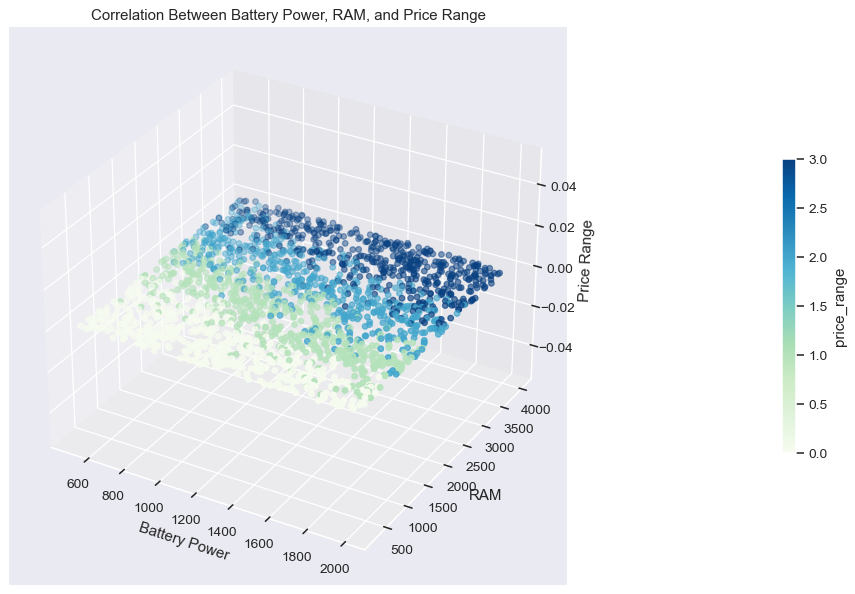

In [18]:
fig = plt.figure(figsize=(10, 8.5), dpi=90)
ax = fig.add_subplot(111, projection='3d')
p1 = ax.scatter(df_train['battery_power'], df_train['ram'], c=df_train['price_range'], cmap='GnBu')
fig.colorbar(p1, shrink=0.5, label='price_range', anchor=(2, 0.5))
ax.set_xlabel("Battery Power")
ax.set_ylabel("RAM")
ax.set_zlabel("Price Range")
ax.set_title("Correlation Between Battery Power, RAM, and Price Range", fontdict={'fontsize': 12})

# Observations

### Bluetooth:
- The blue chart indicates that mobile phones without Bluetooth have a higher frequency compared to those with Bluetooth. 📶
- Among mobile phones without Bluetooth, Low-cost and High-cost phones show the highest frequency, while Very high-cost phones dominate the group of phones with Bluetooth. 📱💙

### Dual Sim:
- The dual_sim chart reveals that mobile phones equipped with Dual Sim have the highest frequency. 📱📱
- In terms of price range, High-cost and Low-cost phones lead among devices without Dual Sim, whereas Very high-cost phones are most prevalent among those with Dual Sim. 📈💵

### 4G:
- Mobile phones with 4G exhibit a higher frequency compared to those without 4G on the four_g chart. 📶
- Among phones with 4G, Medium-cost phones are most common in terms of price range. 💲

### Number of Cores:
- Mobile phones with 4 cores show the highest frequency on the n-cores chart. 🔢
- High-cost phones are predominant among devices with 4 cores, while Medium-cost phones lead among those containing 4 cores. 💸🔋

### 3G:
- The three_g chart displays that mobile phones with 3G have a higher frequency than those without 3G. 📶
- High-cost phones are most common among devices with 3G, while Low-cost phones dominate the group without 3G. 📱🌐

### Touch Screen:
- Phones with Touch Screen have a higher frequency than those without, as shown in the touch_screen chart. 📱🖥️
- Among devices with Touch Screen, Low-cost phones are most prevalent, while High-cost phones are more common in the group without Touch Screen. 💰💻

### Wifi:
- Devices with Wifi have a higher frequency than those without on the wifi chart. 📶
- Very high-cost phones are most prevalent among devices with Wifi, whereas Low-cost phones lead among those without Wifi. 💰📶


In [66]:
list_used_columns=['ram','battery_power','px_width','px_height','int_memory','sc_w','pc','touch_screen','mobile_wt']
len(list_used_columns)

9

In [67]:
from sklearn.model_selection import train_test_split
X = df_train[list_used_columns]
y = df_train['price_range']



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [69]:
# Import classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
# Import Gaussian NB Classification models
from sklearn.naive_bayes import GaussianNB
# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score


from sklearn.ensemble import VotingClassifier

In [70]:
# Initialize classifiers
bagging_clf = BaggingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
perceptron_clf = Perceptron(random_state=42)
svc_clf = SVC(random_state=42)
GradientBoostingClassifier_clf=GradientBoostingClassifier()
LinearDiscriminantAnalysis_clf=LinearDiscriminantAnalysis()
AdaBoostClassifier_clf=AdaBoostClassifier()

In [71]:
# List of classifiers
classifiers = [
    ('Bagging', bagging_clf),
    ('Random Forest', rf_clf),
    ('Decision Tree', dt_clf),
    ('Perceptron', perceptron_clf),
    ('SVC', svc_clf),
    ('GradientBoostingClassifier',GradientBoostingClassifier_clf),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis_clf),
    ('AdaBoostClassifier',AdaBoostClassifier_clf)
]

In [72]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[],
    'precision':[],
    'recall':[],
    'F1_score':[],
}
Maxaccuracy=0


In [73]:
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Precision: {precision:.2f}")

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Recall: {recall:.2f}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"F1 Score: {f1:.2f}")
    
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    dicDataFrame['precision'].append(precision)
    dicDataFrame['recall'].append(recall)
    dicDataFrame['F1_score'].append(f1)

    if accuracy > Maxaccuracy:
        Maxaccuracy = accuracy
        ListMax_accuracy = [(clf_name, clf)]


Classifier: Bagging
Accuracy: 88.75%
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Classifier: Random Forest
Accuracy: 89.50%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Classifier: Decision Tree
Accuracy: 82.50%
Precision: 0.83
Recall: 0.82
F1 Score: 0.83
Classifier: Perceptron
Accuracy: 50.50%
Precision: 0.52
Recall: 0.51
F1 Score: 0.39
Classifier: SVC
Accuracy: 95.25%
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Classifier: GradientBoostingClassifier
Accuracy: 92.25%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Classifier: LinearDiscriminantAnalysis
Accuracy: 94.75%
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Classifier: AdaBoostClassifier
Accuracy: 79.25%
Precision: 0.81
Recall: 0.79
F1 Score: 0.79


In [75]:
DataFrame=pd.DataFrame(dicDataFrame)
# DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy,Maxprecision,Maxrecall,Maxf1]

In [76]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7], axis=0)

,CLASSIFIER NAME,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Bagging,"88,750","0,893","0,887","0,887"
1,Random Forest,"89,500","0,897","0,895","0,895"
2,Decision Tree,"82,500","0,828","0,825","0,826"
3,Perceptron,"50,500","0,523","0,505","0,393"
4,SVC,"95,250","0,954","0,953","0,952"
5,GradientBoostingClassifier,"92,250","0,924","0,922","0,923"
6,LinearDiscriminantAnalysis,"94,750","0,949","0,948","0,948"
7,AdaBoostClassifier,"79,250","0,806","0,792","0,793"


In [77]:
import pickle  # .pickle extension model , h5. or .json,  games or programs.exe

with open('pricetelephone','wb') as file: # write binary 
    pickle.dump(LinearDiscriminantAnalysis_clf,file) # put model into file

In [78]:
with open('pricetelephone','rb') as file: # read binary 
    ourModel = pickle.load(file) # model is loaded into : ourModel  

In [79]:
ourModel.coef_

array([[-1.38007604e-02, -7.61092072e-03, -4.26407673e-03,
        -3.86549255e-03, -9.27512861e-03,  1.04370194e-02,
        -9.27120619e-03,  1.72981504e-01,  1.18855329e-02],
       [-4.27012650e-03, -2.09649412e-03, -1.27778070e-03,
        -9.16078607e-04, -3.49719541e-03, -1.97346124e-02,
        -6.94401290e-05,  1.07596988e-01,  4.15762336e-03],
       [ 4.16814069e-03,  1.97243605e-03,  1.10378154e-03,
         9.38025581e-04, -1.70939212e-03, -4.75831731e-03,
         3.55979847e-03, -1.36730467e-01, -9.59012195e-04],
       [ 1.37585904e-02,  7.64901926e-03,  4.38733627e-03,
         3.80103250e-03,  1.41925666e-02,  1.35391037e-02,
         5.78240455e-03, -1.44028978e-01, -1.48450626e-02]])

In [80]:
ourModel.predict([list(df_train[list_used_columns].iloc[0])])

C:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [81]:
list(df_train[list_used_columns].iloc[0])

[2549, 842, 756, 20, 7, 7, 2, 0, 188]

In [31]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [32]:
X_test_norm

array([[0.51737039, 0.60521042, 0.47895792, ..., 0.2       , 0.        ,
        0.2       ],
       [0.49572421, 0.20708083, 0.62057448, ..., 0.65      , 0.        ,
        0.21666667],
       [0.2797969 , 0.39478958, 0.61723447, ..., 0.5       , 1.        ,
        0.875     ],
       ...,
       [0.55531801, 0.88777555, 0.72344689, ..., 0.6       , 1.        ,
        0.925     ],
       [0.2172635 , 0.87241149, 0.87775551, ..., 0.        , 0.        ,
        0.14166667],
       [0.93826831, 0.68203073, 0.7989312 , ..., 0.55      , 0.        ,
        0.68333333]])

In [33]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[],
    'precision':[],
    'recall':[],
    'F1_score':[],
}
Maxaccuracy=0


In [34]:
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Precision: {precision:.2f}")

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Recall: {recall:.2f}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"F1 Score: {f1:.2f}")
    
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    dicDataFrame['precision'].append(precision)
    dicDataFrame['recall'].append(recall)
    dicDataFrame['F1_score'].append(f1)

    if accuracy > Maxaccuracy:
        Maxaccuracy = accuracy
        ListMax_accuracy = [(clf_name, clf)]


Classifier: Bagging
Accuracy: 89.25%
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Classifier: Random Forest
Accuracy: 89.50%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Classifier: Decision Tree
Accuracy: 82.50%
Precision: 0.83
Recall: 0.82
F1 Score: 0.83
Classifier: Perceptron
Accuracy: 74.00%
Precision: 0.75
Recall: 0.74
F1 Score: 0.74
Classifier: SVC
Accuracy: 91.00%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Classifier: GradientBoostingClassifier
Accuracy: 92.25%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Classifier: LinearDiscriminantAnalysis
Accuracy: 94.75%
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Classifier: AdaBoostClassifier
Accuracy: 79.25%
Precision: 0.81
Recall: 0.79
F1 Score: 0.79


In [35]:
DataFrame=pd.DataFrame(dicDataFrame)
# DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy,Maxprecision,Maxrecall,Maxf1]

In [36]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7], axis=0)

,CLASSIFIER NAME,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Bagging,"89,250","0,898","0,892","0,892"
1,Random Forest,"89,500","0,897","0,895","0,895"
2,Decision Tree,"82,500","0,828","0,825","0,826"
3,Perceptron,"74,000","0,746","0,740","0,742"
4,SVC,"91,000","0,913","0,910","0,910"
5,GradientBoostingClassifier,"92,250","0,924","0,922","0,923"
6,LinearDiscriminantAnalysis,"94,750","0,949","0,948","0,948"
7,AdaBoostClassifier,"79,250","0,806","0,792","0,793"


## PCA

In [37]:
from sklearn.decomposition import PCA

In [47]:
from sklearn.model_selection import train_test_split
X = df_train.drop('price_range', axis = 1)
X = df_train[list_used_columns]
y = df_train['price_range']

In [48]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=27)

In [50]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [51]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[],
    'precision':[],
    'recall':[],
    'F1_score':[],
}
Maxaccuracy=0


In [52]:
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Precision: {precision:.2f}")

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"Recall: {recall:.2f}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use an appropriate average
    print(f"F1 Score: {f1:.2f}")
    
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    dicDataFrame['precision'].append(precision)
    dicDataFrame['recall'].append(recall)
    dicDataFrame['F1_score'].append(f1)

    if accuracy > Maxaccuracy:
        Maxaccuracy = accuracy
        ListMax_accuracy = [(clf_name, clf)]

Classifier: Bagging
Accuracy: 78.25%
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
Classifier: Random Forest
Accuracy: 78.75%
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Classifier: Decision Tree
Accuracy: 75.50%
Precision: 0.75
Recall: 0.76
F1 Score: 0.75
Classifier: Perceptron
Accuracy: 33.00%
Precision: 0.27
Recall: 0.33
F1 Score: 0.27
Classifier: SVC
Accuracy: 82.50%
Precision: 0.83
Recall: 0.82
F1 Score: 0.83
Classifier: GradientBoostingClassifier
Accuracy: 79.00%
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Classifier: LinearDiscriminantAnalysis
Accuracy: 81.00%
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Classifier: AdaBoostClassifier
Accuracy: 56.75%
Precision: 0.69
Recall: 0.57
F1 Score: 0.54


In [53]:
DataFrame=pd.DataFrame(dicDataFrame)

In [54]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7], axis=0)

,CLASSIFIER NAME,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Bagging,"78,250","0,780","0,782","0,780"
1,Random Forest,"78,750","0,787","0,787","0,787"
2,Decision Tree,"75,500","0,755","0,755","0,755"
3,Perceptron,"33,000","0,271","0,330","0,270"
4,SVC,"82,500","0,829","0,825","0,826"
5,GradientBoostingClassifier,"79,000","0,790","0,790","0,789"
6,LinearDiscriminantAnalysis,"81,000","0,813","0,810","0,811"
7,AdaBoostClassifier,"56,750","0,690","0,568","0,537"
